**Why this analysis - This Data Analysis is for getting insights about the mobile apps w.r.t its future business approaches and development of mobile apps. This study has been summarised from the historical data available from the Google Play store from June 2012 till February 2019. It also helps to know the trend involved in the categories of mobile app availability, usability, and users' expectations.**

In [1]:
#let importing a libraries as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Datatype correction

In [4]:
#Clean the "Reviews" column by removing non-numeric characters
df['Reviews'] = df['Reviews'].str.replace('M', '').astype(float) * 1e6

In [5]:
#Convert the "Reviews" column to integer
df["Reviews"]=df["Reviews"].astype(int)

In [6]:
# Convert string to datetime
df["Last Updated"]=pd.to_datetime(df["Last Updated"],errors='coerce')

## 1.Which is the most used Android version?

In [7]:
most_used_android_version = df['Android Ver'].value_counts().idxmax()
print(f"Most Used Android Version: {most_used_android_version}")

Most Used Android Version: 4.1 and up


In [8]:
# Count the occurrences of each Android version
android_version=df["Android Ver"].value_counts()[0:10]

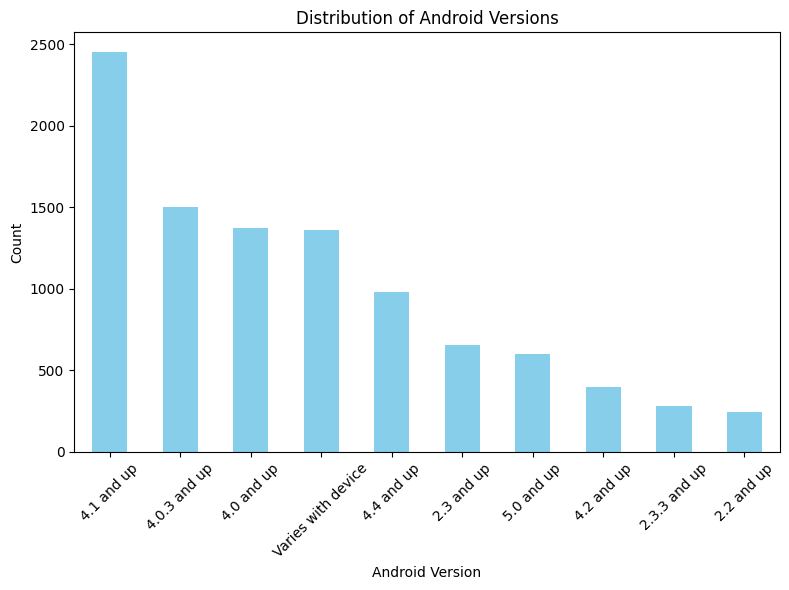

In [9]:
# Plot the bar chart
plt.figure(figsize=(8,6))
android_version.plot(kind='bar', color='skyblue')
plt.title('Distribution of Android Versions')
plt.xlabel('Android Version')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Most Used Android Version: 4.1 and up in google playstore**

## 2.Which all categories of mob apps are existing from this dataset?

In [10]:
categories = df['Category'].unique()

print(categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [11]:
# Count the occurrences of each category of top 10
top10=df["Category"].value_counts()[0:10]

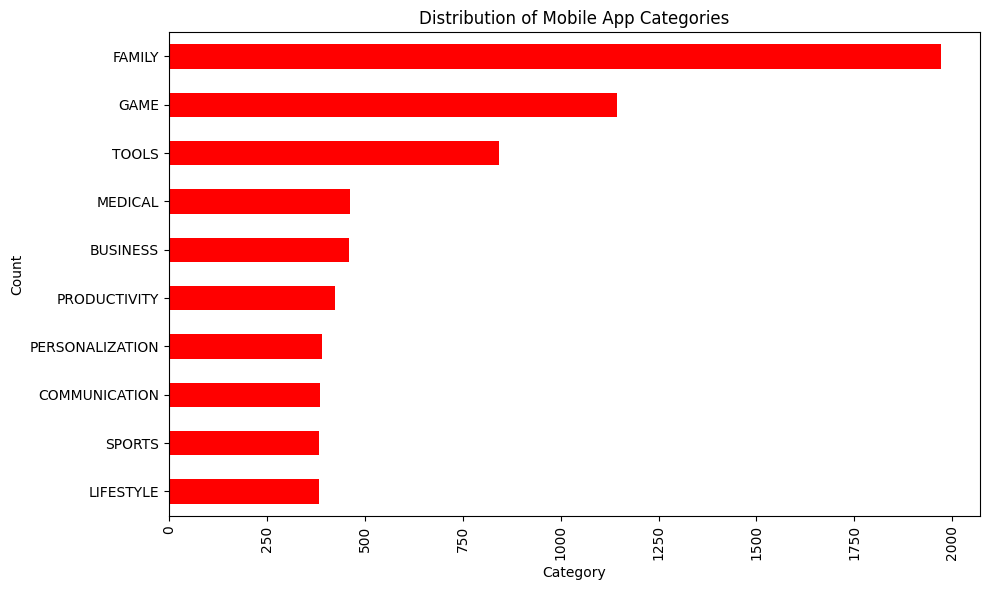

In [12]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
top10.plot(kind='barh', color='red')
plt.title('Distribution of Mobile App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

## 3.Which is the most installed category of mob app from this dataset?

In [13]:
#let see unique data
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

**#let change or replace "+","o","free"**

In [14]:
# Step 1: Remove the plus sign ('+')
df['Installs'] = df['Installs'].str.replace('+', '')

In [15]:
# Step 2: Convert 'Free' entries to '0'
df['Installs'] = df['Installs'].replace('Free', '0')

In [16]:
# Step 3: Convert '0' entries to NaN
df['Installs'] = df['Installs'].replace('0', np.nan)

In [17]:
# Step 4: Convert the remaining entries to numeric format
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [18]:
most_installed_category = df.groupby('Category')['Installs'].sum().idxmax()
print(f"Most Installed Category: {most_installed_category}")

Most Installed Category: FAMILY


In [19]:
category_installs = df.groupby('Category')['Installs'].sum().max()
print("Total installs in the most installed category:",category_installs )

Total installs in the most installed category: 48505.0


In [20]:
most_installed_category=df.groupby("Category")["Installs"].sum()

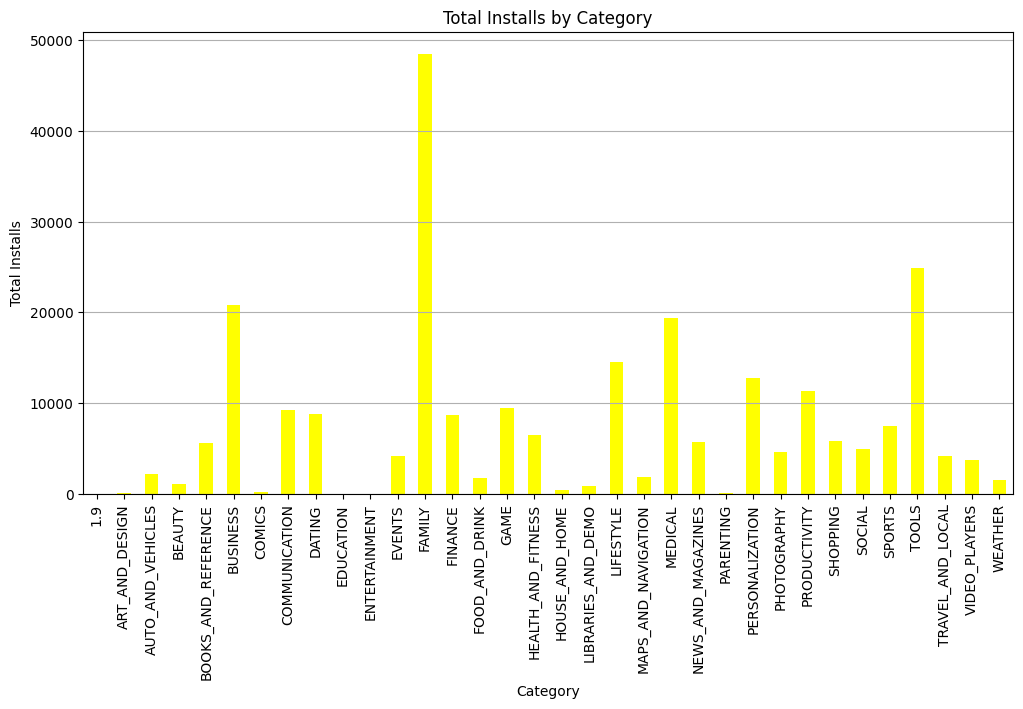

In [21]:
# Plotting
plt.figure(figsize=(12, 6))
most_installed_category.plot(kind='bar', color='yellow')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

**The most installed category of mobile apps is: FAMILY
Total installs in the most installed category: 48505.0**

## 4.How many total categories are there?

In [22]:
#TO FIND TOTAL CATEGORIES USING UNIQUE COUNTS
total_categories = df['Category'].nunique()
print(f"Total Categories: {total_categories}")

Total Categories: 34


In [23]:
# Count the number of apps in each category
total_category = df['Category'].value_counts()

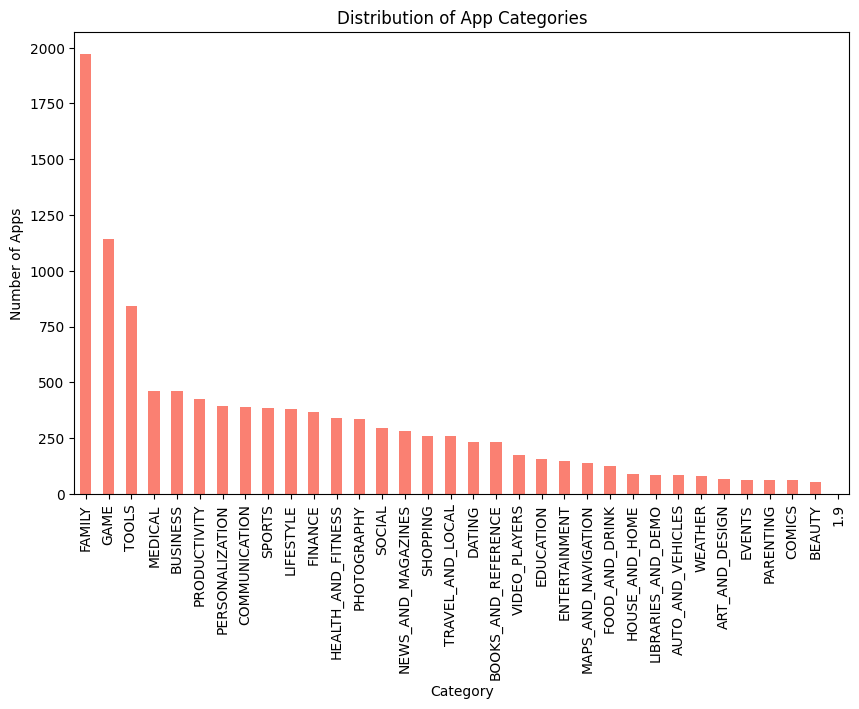

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
total_category.plot(kind='bar', color='salmon')
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

**Total number of categories: 34**

## 5.Which apps have got 5-star ratings

In [25]:
five_star_apps = df[df['Rating'] == 5.0]['App']
print("Apps with 5-star Ratings:")
print(five_star_apps)

Apps with 5-star Ratings:
329                    Hojiboy Tojiboyev Life Hacks
612                   American Girls Mobile Numbers
615                                    Awake Dating
633                           Spine- The dating app
636      Girls Live Talk - Free Text and Video Chat
                            ...                    
10721                             Mad Dash Fo' Cash
10742                         GKPB FP Online Church
10776                              Monster Ride Pro
10820                               Fr. Daoud Lamei
10837              Fr. Mike Schmitz Audio Teachings
Name: App, Length: 274, dtype: object


In [26]:
# Filter the DataFrame for apps with 5-star ratings
five_star_apps = df[df['Rating'] == 5.0][0:10]

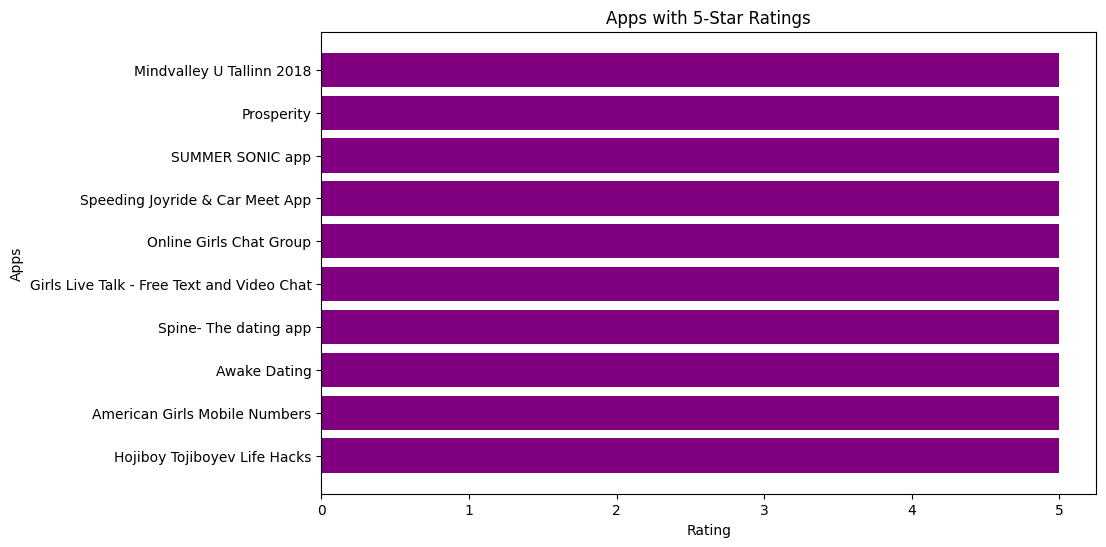

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(five_star_apps["App"],five_star_apps["Rating"],color='purple')
plt.title('Apps with 5-Star Ratings')
plt.xlabel('Rating')
plt.ylabel('Apps')
plt.show()

## 6.Which are the top 10 mob apps based on ratings?

In [28]:
top_10_apps_ratings = df.nlargest(10, 'Rating')[['App', 'Rating']]
print("Top 10 Apps Based on Ratings:")
print(top_10_apps_ratings)

Top 10 Apps Based on Ratings:
                                              App  Rating
10472     Life Made WI-Fi Touchscreen Photo Frame    19.0
329                  Hojiboy Tojiboyev Life Hacks     5.0
612                 American Girls Mobile Numbers     5.0
615                                  Awake Dating     5.0
633                         Spine- The dating app     5.0
636    Girls Live Talk - Free Text and Video Chat     5.0
640                       Online Girls Chat Group     5.0
654               Speeding Joyride & Car Meet App     5.0
1028                             SUMMER SONIC app     5.0
1030                                   Prosperity     5.0


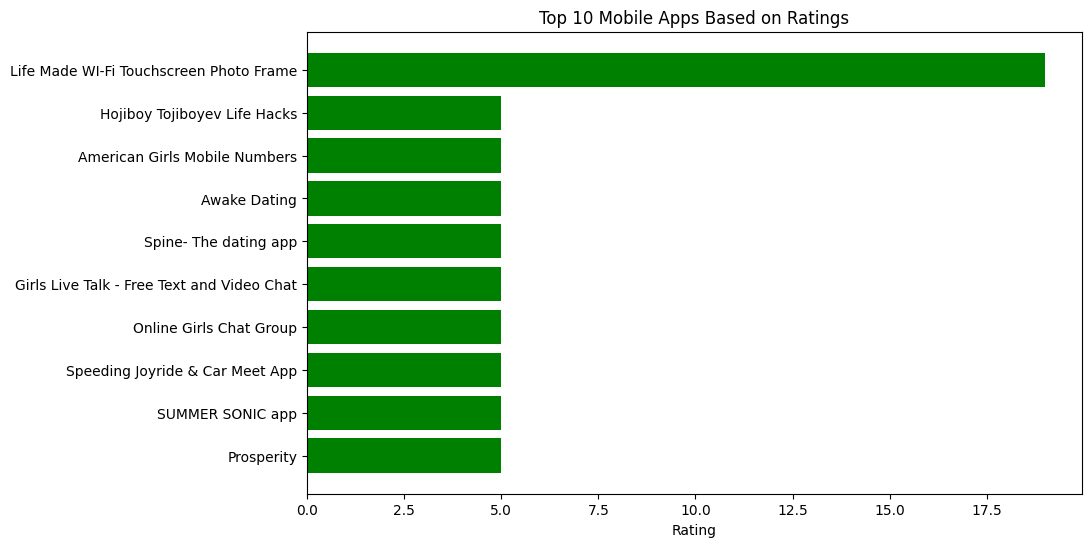

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_apps_ratings['App'], top_10_apps_ratings['Rating'], color='green')
plt.xlabel('Rating')
plt.title('Top 10 Mobile Apps Based on Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()


**Life Made WI-Fi Touchscreen Photo Frame apps in google playstore have highest rating of 19**